In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
column_names = ['user_id','item_id','rating','timestamp']

In [7]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [9]:
sns.set_style('white')

In [10]:
df.groupby('item_id')['rating'].mean().sort_values(ascending=False)

item_id
1293    5.000000
1467    5.000000
1653    5.000000
814     5.000000
1122    5.000000
1599    5.000000
1201    5.000000
1189    5.000000
1500    5.000000
1536    5.000000
1449    4.625000
1642    4.500000
119     4.500000
1398    4.500000
1594    4.500000
408     4.491071
318     4.466443
169     4.466102
483     4.456790
114     4.447761
64      4.445230
603     4.387560
12      4.385768
50      4.359589
178     4.344000
513     4.333333
1639    4.333333
1191    4.333333
134     4.292929
963     4.292683
          ...   
1576    1.000000
1575    1.000000
1574    1.000000
1566    1.000000
1572    1.000000
1571    1.000000
1570    1.000000
1569    1.000000
1586    1.000000
1563    1.000000
858     1.000000
1562    1.000000
852     1.000000
1568    1.000000
1626    1.000000
830     1.000000
1363    1.000000
1621    1.000000
1618    1.000000
439     1.000000
1546    1.000000
1374    1.000000
1548    1.000000
1373    1.000000
437     1.000000
1601    1.000000
1557    1.000000
1559  

In [11]:
df.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     584
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df.groupby('item_id')['rating'].mean())

In [14]:
ratings.head()

,rating
item_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


In [15]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('item_id')['rating'].count())

In [16]:
ratings.head()

,rating,num_of_ratings
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


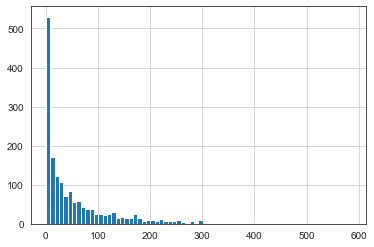

In [17]:
ratings['num_of_ratings'].hist(bins=70)

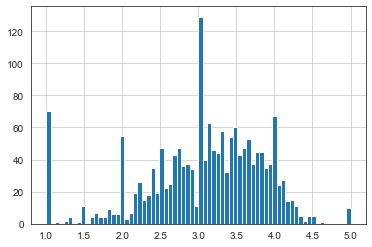

In [18]:
ratings['rating'].hist(bins=70)

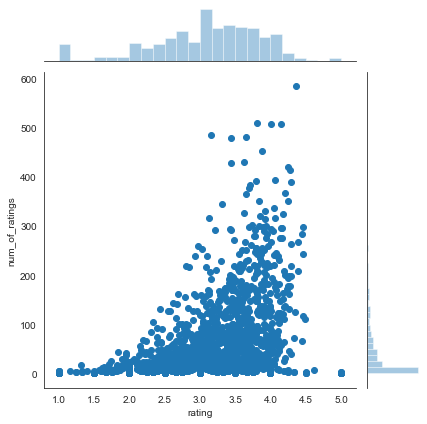

In [19]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings)

In [20]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [21]:
moviemat = df.pivot_table(index='user_id',columns='item_id',values='rating')

In [22]:
moviemat.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ratings.sort_values('num_of_ratings',ascending=False).head()

,rating,num_of_ratings
item_id,,
50,4.359589,584
258,3.803536,509
100,4.155512,508
181,4.007890,507
294,3.156701,485


In [25]:
item_50_user_ratings = moviemat[50]
item_294_user_ratings = moviemat[294]

In [26]:
similar_to_item_50 = moviemat.corrwith(item_50_user_ratings)

C:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [27]:
similar_to_item_294 = moviemat.corrwith(item_294_user_ratings)

In [28]:
corr_item_50 = pd.DataFrame(similar_to_item_50,columns=['correlation'])

In [29]:
corr_item_50.head()

,correlation
item_id,
1,0.180020
2,0.131348
3,0.036925
4,0.259182
5,0.031792


In [30]:
corr_item_50.sort_values('correlation',ascending=False).head(10)

,correlation
item_id,
766,1.0
1096,1.0
1301,1.0
1380,1.0
1537,1.0
1416,1.0
1541,1.0
1242,1.0
1238,1.0


In [31]:
corr_item_50 = corr_item_50.join(ratings['num_of_ratings'])

In [32]:
corr_item_50.head()

,correlation,num_of_ratings
item_id,,
1,0.180020,452
2,0.131348,131
3,0.036925,90
4,0.259182,209
5,0.031792,86


In [33]:
corr_item_50[corr_item_50['num_of_ratings']>100].sort_values('correlation',ascending=False).head(10)

,correlation,num_of_ratings
item_id,,
50,1.000000,584
172,0.748353,368
181,0.672556,507
174,0.536117,420
249,0.377433,130
194,0.367538,241
210,0.350107,331
404,0.347868,101
123,0.332729,115


In [34]:
corr_item_294 = pd.DataFrame(similar_to_item_294,columns=['Corre'])

In [35]:
corr_item_294.dropna(inplace=True)

In [36]:
corr_item_294 = corr_item_294.join(ratings['num_of_ratings'])

In [37]:
corr_item_294[corr_item_294['num_of_ratings']>100].sort_values('Corre',ascending=False).head()

,Corre,num_of_ratings
item_id,,
294,1.000000,485
29,0.516968,114
72,0.484650,129
926,0.472681,101
1016,0.469828,137


In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [41]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


In [42]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [43]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [44]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [45]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [47]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1239262498099962
Item-based CF RMSE: 3.4515230428887484


In [49]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of data is ' +  str(sparsity*100) + '%')

The sparsity level of data is 93.7%


In [50]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.726593858575171
